## Basic Training

In [4]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

import numpy as np
import pandas as pd

In [5]:
hmhas = pd.read_csv('dataset/h_mas_resh.csv')

In [6]:
hmhas

,Unnamed: 0,iwstat,proxy,wthh,wtresp,iwm,iwy,iwf,agey,mpart,...,lexcl3,lstsf3,limptt3,lchnot3,lsatsc3,lsatsc3m,satlife,satlifez,rcchorehr,witwill
0,2,1.0,0.0,263.0,253.0,6.0,2001.0,0.0,69.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1.0,0.0,471.0,454.0,6.0,2001.0,0.0,50.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,1.0,0.0,350.0,337.0,6.0,2001.0,0.0,64.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,1.0,0.0,306.0,295.0,6.0,2001.0,0.0,56.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,1.0,0.0,263.0,253.0,6.0,2001.0,0.0,52.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101516,22095,1.0,0.0,NaN,2800.0,12.0,2018.0,0.0,58.0,0.0,...,2.0,3.0,3.0,3.0,2.8,0.0,1.0,-0.393398,0.0,0.0
101517,22097,1.0,0.0,NaN,1633.0,12.0,2018.0,0.0,75.0,0.0,...,3.0,3.0,3.0,3.0,3.0,0.0,1.0,-0.393398,96.0,0.0
101518,22098,1.0,0.0,NaN,1536.0,12.0,2018.0,0.0,61.0,0.0,...,3.0,3.0,3.0,3.0,3.0,0.0,1.0,-0.393398,96.0,0.0
101519,22099,1.0,0.0,NaN,2100.0,12.0,2018.0,0.0,70.0,0.0,...,2.0,3.0,3.0,2.0,2.6,0.0,1.0,-0.393398,0.0,0.0


In [7]:
hmhas.columns

Index(['Unnamed: 0', 'iwstat', 'proxy', 'wthh', 'wtresp', 'iwm', 'iwy', 'iwf',
       'agey', 'mpart',
       ...
       'lexcl3', 'lstsf3', 'limptt3', 'lchnot3', 'lsatsc3', 'lsatsc3m',
       'satlife', 'satlifez', 'rcchorehr', 'witwill'],
      dtype='object', length=366)

# Preprocessing

In [8]:
df = hmhas

from sklearn.model_selection import train_test_split

X_train = df.drop("hosp1y", axis=1)

# Assign the 'target' column to y_train

y_train = df["hosp1y"]

# Remove the 'target' column for test
X_test = df.drop("hosp1y", axis=1)

# Assign the 'target' column to y_test
y_test = df["hosp1y"]

# separate dataset into train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)


In [9]:
#Drop Categorical :
categorical_cols = X_train.select_dtypes(include=['object']).columns

X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)
X_val = X_val.drop(categorical_cols, axis=1)

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute values for all columns with missing data
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(X_train)

n_train_df = imp_mean.transform(X_train)
t_val_df = imp_mean.transform(X_val)
t_test_df = imp_mean.transform(X_test)

# Scaling all Numerical features

scaler = StandardScaler()
scaler = scaler.fit(n_train_df)

t_train_df = scaler.transform(n_train_df)
t_val_df = scaler.transform(t_val_df)
t_test_df = scaler.transform(t_test_df)


In [11]:
%%time

# This is an example code on how to:
#   - Create and fit (train) a logistic regression
#   - Assign to `log_reg` variable
log_reg = None
log_reg = LogisticRegression(C=0.001)
log_reg.fit(t_train_df, y_train)


CPU times: total: 7.78 s
Wall time: 3.04 s


LogisticRegression(C=0.001)

In [12]:
log_reg_train = log_reg.predict_proba(t_train_df)[:, 1]

In [13]:
roc_auc_train = roc_auc_score(y_true=y_train, y_score=log_reg_train)

print(f"Train ROC AUC Score: {roc_auc_train:.4f}") 

Train ROC AUC Score: 0.9603


# Multiple Training

In [15]:
import lightgbm as lgb

In [18]:
%%time

models = {
    "Logistic Regression": LogisticRegression(C=0.001),
    "      Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "      LGBClassifier ": lgb.LGBMClassifier(learning_rate=0.2)
}

for name, model in models.items():
    model.fit(t_train_df, y_train)
    print(name + " trained.")

Logistic Regression trained.
      Random Forest trained.
[LightGBM] [Info] Number of positive: 9750, number of negative: 71466
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.120236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11894
[LightGBM] [Info] Number of data points in the train set: 81216, number of used features: 359
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120050 -> initscore=-1.991955
[LightGBM] [Info] Start training from score -1.991955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

# Results

In [19]:
for name, model in models.items():
    y_pred = model.predict(t_test_df)
    acc = accuracy_score(y_test, y_pred)
    print(name + " Accuracy: {:.2f}%".format(acc * 100))

Logistic Regression Accuracy: 93.71%
      Random Forest Accuracy: 96.79%
      LGBClassifier  Accuracy: 100.00%


In [20]:
for name, model in models.items():
    y_pred = model.predict(t_test_df)
    f1 = f1_score(y_test, y_pred)
    print(name + " F1-Score: {:.5f}".format(f1))

Logistic Regression F1-Score: 0.64511
      Random Forest F1-Score: 0.84568
      LGBClassifier  F1-Score: 1.00000


## Neural NetWork Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 30
batch_size = 32

model.fit(t_train_df, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

mlp = model

# Send the input data through the trained model to get the predictions
predictions = mlp.predict(t_test_df)


Epoch 1/30
2285/2285 [==============================] - 6s 2ms/step - loss: 0.1666 - accuracy: 0.9411 - val_loss: 0.0836 - val_accuracy: 0.9702
Epoch 2/30
2285/2285 [==============================] - 5s 2ms/step - loss: 0.0387 - accuracy: 0.9867 - val_loss: 0.0281 - val_accuracy: 0.9908
Epoch 3/30
2285/2285 [==============================] - 5s 2ms/step - loss: 0.0158 - accuracy: 0.9954 - val_loss: 0.0175 - val_accuracy: 0.9950
Epoch 4/30
2285/2285 [==============================] - 5s 2ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.0199 - val_accuracy: 0.9920
Epoch 5/30
2285/2285 [==============================] - 5s 2ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.0090 - val_accuracy: 0.9979
Epoch 6/30
2285/2285 [==============================] - 5s 2ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.0085 - val_accuracy: 0.9974
Epoch 7/30
2285/2285 [==============================] - 5s 2ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0077 - val_accuracy:

In [43]:
predictions.shape

(101521, 1)

## Classification Report

In [69]:
# Extract the probabilities

p_pred = predictions.flatten()

# Extract the Class labels
y_pred = np.where(p_pred > 0.5, 1, 0)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89347
         1.0       1.00      1.00      1.00     12174

    accuracy                           1.00    101521
   macro avg       1.00      1.00      1.00    101521
weighted avg       1.00      1.00      1.00    101521



## Confusion Matrix

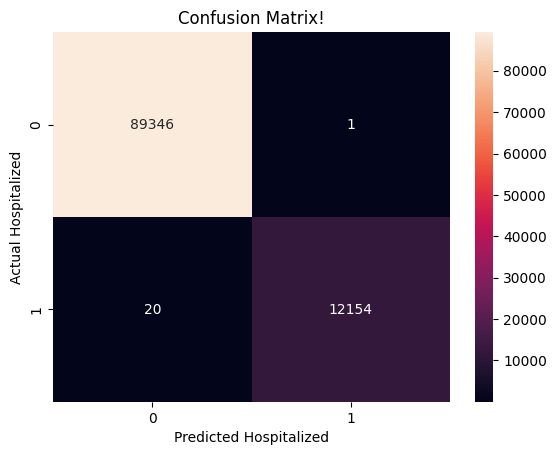

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

matc=confusion_matrix(y_test, y_pred)

ax = sns.heatmap(matc, annot=True, fmt='g');

ax.set_title('Confusion Matrix!');
ax.set_xlabel('Predicted Hospitalized')
ax.set_ylabel('Actual Hospitalized');

# Plot the confusion matrix

plt.show()